# Figure 1

## setup and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rna_secstruct import SecStruct

from dms_3d_features.plotting import plot_pop_avg_from_row, publication_style_ax

In [2]:
DATA_PATH = "../data"

In [3]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1_combined.json")
df_2 = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_2_combined.json")
df_motif = pd.read_json(f"{DATA_PATH}/raw-jsons/motifs/pdb_library_1_motifs_standard.json")
df_residue = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")

## plot data

### construct to highlight diversity of structures. Find one with the most different motifs

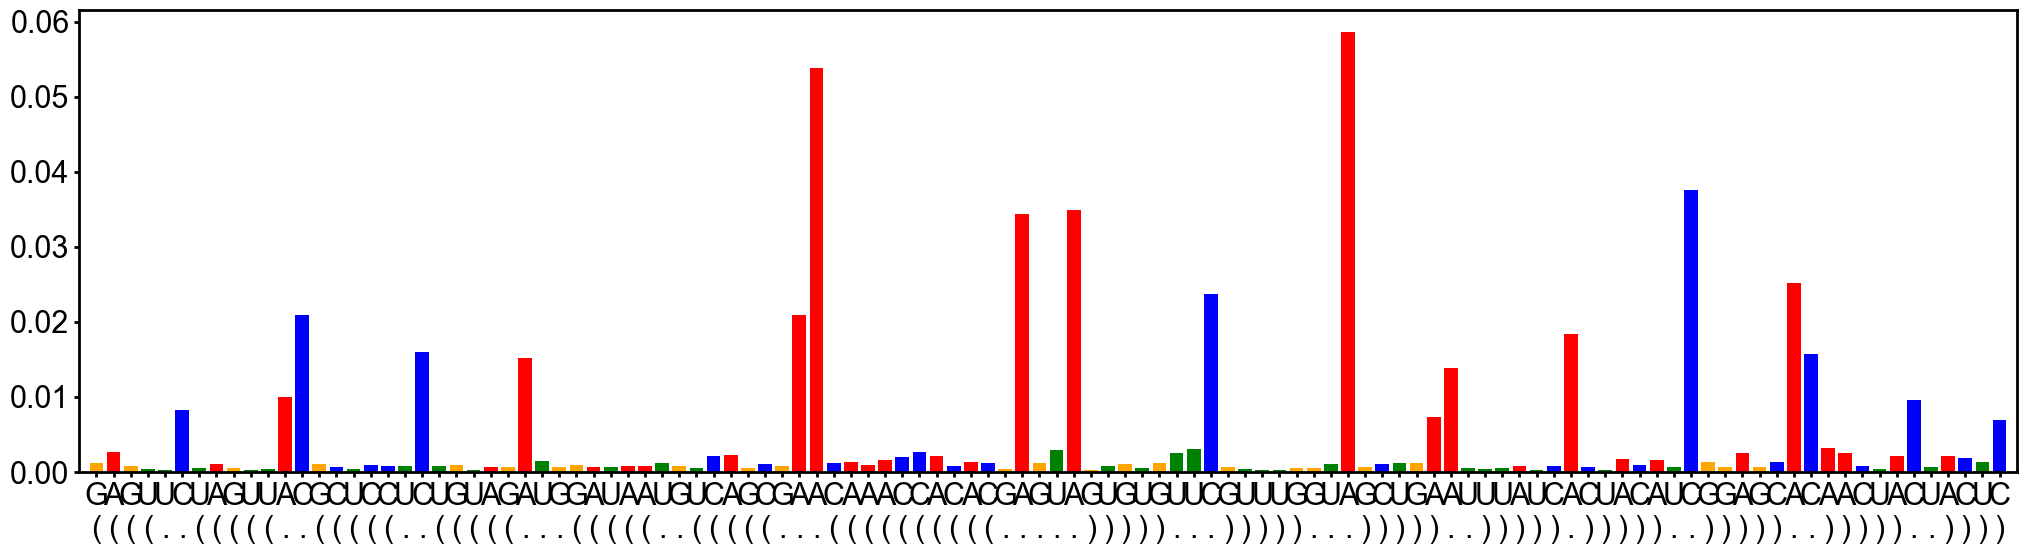

In [4]:
row = df.iloc[7000].to_dict()
row["sequence"] = row["sequence"][1:]
row["structure"] = row["structure"][1:]
row["data"] = row["data"][1:]
fig, ax = plt.subplots(figsize=(25, 6))
ax = plot_pop_avg_from_row(row, ax=ax)
ax.set_xlim(-1, 112)
publication_style_ax(ax)

In [5]:
best_i = -1
best_score = 0
for i, row in df.iterrows():
    ss = SecStruct(row["sequence"], row["structure"])
    structs = [j.structure for j in ss.get_junctions()]
    num = len(set(structs))
    if num > best_score:
        best_score = num
        best_i = i
        print(f"New best: {best_i} with {best_score} unique junctions")

New best: 0 with 1 unique junctions
New best: 1 with 4 unique junctions
New best: 244 with 5 unique junctions
New best: 1071 with 6 unique junctions
New best: 4342 with 7 unique junctions


In [6]:
best_score = 0
for i, row in df.iterrows():
    ss = SecStruct(row["sequence"], row["structure"])
    structs = [j.structure for j in ss.get_junctions()]
    num = len(set(structs))
    if num == 7:
        print(i)

4342
5094
5211
7021
7067


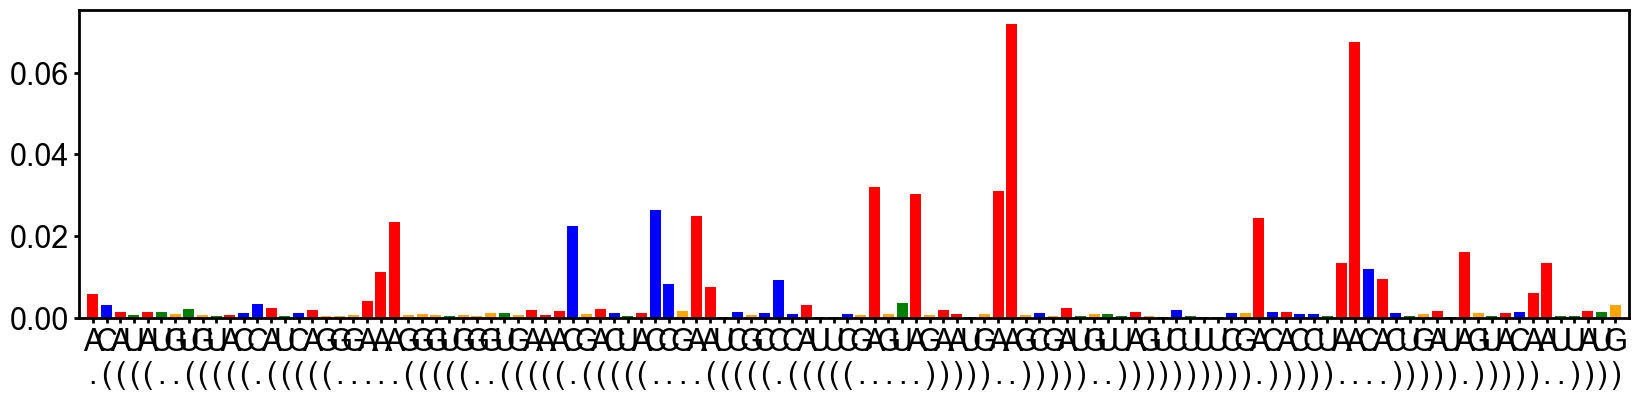

In [7]:
ax = plot_pop_avg_from_row(df.iloc[7067])
ax.set_xlim(-1, 112)
publication_style_ax(ax)

In [8]:
print(df.iloc[7067]["sequence"])
print(df.iloc[7067]["structure"])

ACAUAUGUGUACCAUCAGGGAAAGGGUGGGUGAAACGACUACCGAAUCGCCCAUUCGAGUAGAAUGAAGCGAUGUUAGUCUUUCGACACCUAACACUGAUAGUACAAUUAUG
.((((..(((((.(((((.....(((((..(((((.(((((....(((((.(((((.....)))))..)))))..)))))))))).)))))....))))).)))))..))))


### plot reproducibility